In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
data = pd.read_csv('/Users/suchithkurra/Desktop/Honey_Pot Research/data/DDoS.csv')

In [3]:
# Data preprocessing
# Drop any rows with missing values
data.dropna(inplace=True)

In [4]:
# Replace infinite or very large values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

In [5]:
# Drop rows containing NaN values
data.dropna(inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder

# Encode target variable
label_encoder = LabelEncoder()
data[' Label'] = label_encoder.fit_transform(data[' Label'])


In [7]:
# Split the dataset into features and target variable
X = data.drop(' Label', axis=1)  # Adjust 'target_column_name' with the name of your target column
y = data[' Label']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [9]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# SelectKBest with ANOVA F-value
k = 20  # Number of top features to select
selector = SelectKBest(score_func=f_classif, k=k)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

In [11]:
selected_features_indices = selector.get_support(indices=True)


In [12]:
selected_feature_names = X.columns[selected_features_indices]


In [13]:
# Print the selected feature names
print("Selected features:")
print(selected_feature_names)

Selected features:
Index([' Destination Port', 'Total Length of Fwd Packets',
       ' Fwd Packet Length Max', ' Fwd Packet Length Mean',
       'Bwd Packet Length Max', ' Bwd Packet Length Min',
       ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Bwd IAT Total',
       ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean',
       ' Packet Length Std', ' Packet Length Variance', ' URG Flag Count',
       ' Average Packet Size', ' Avg Fwd Segment Size',
       ' Avg Bwd Segment Size', ' Subflow Fwd Bytes', ' min_seg_size_forward'],
      dtype='object')


In [14]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_selected, y_train)

RandomForestClassifier(random_state=42)

In [15]:
# Predictions
y_pred = rf_model.predict(X_test_selected)

In [16]:
# Evaluation metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     29321
           1       1.00      1.00      1.00     38393

    accuracy                           1.00     67714
   macro avg       1.00      1.00      1.00     67714
weighted avg       1.00      1.00      1.00     67714

Confusion Matrix:
[[29319     2]
 [   25 38368]]


In [17]:
# ROC Curve and AUC Score
y_prob = rf_model.predict_proba(X_test_selected)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

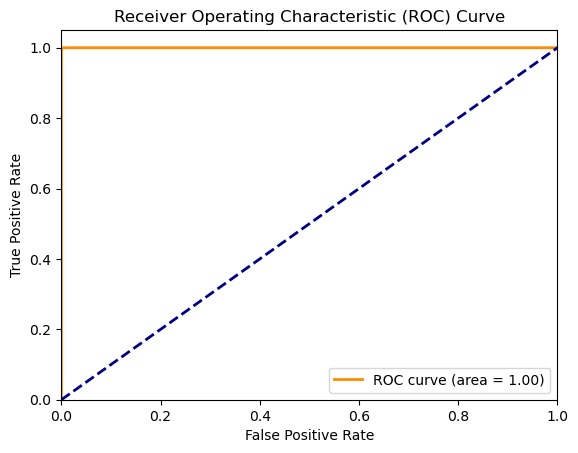

In [18]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


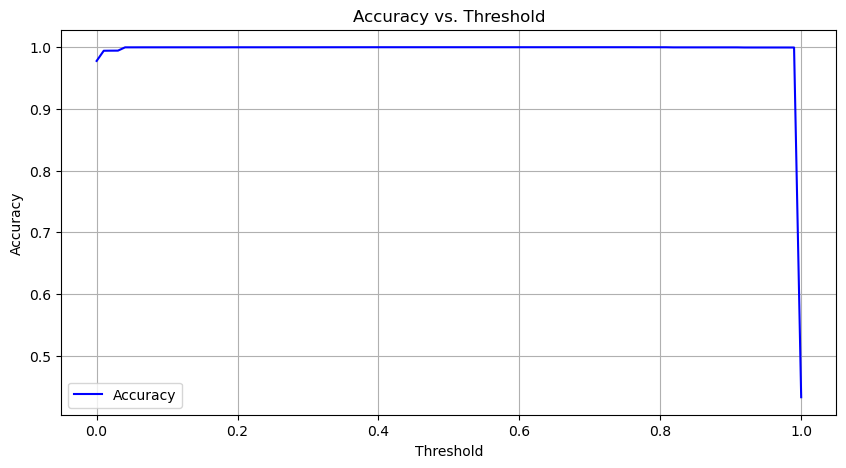

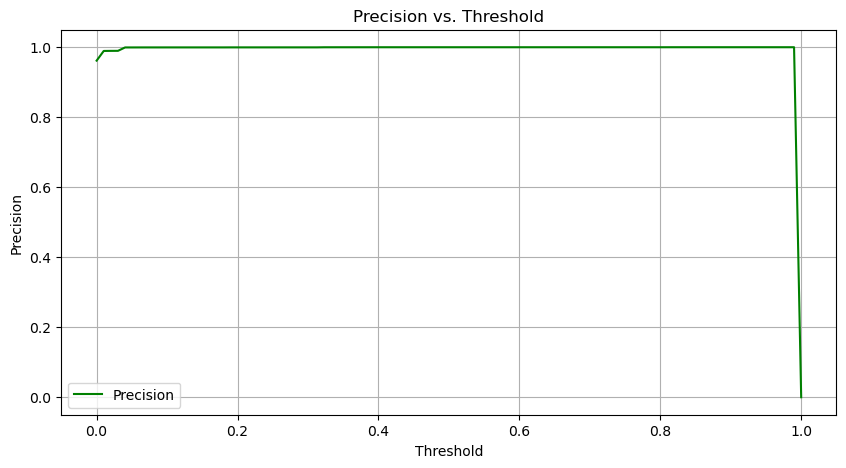

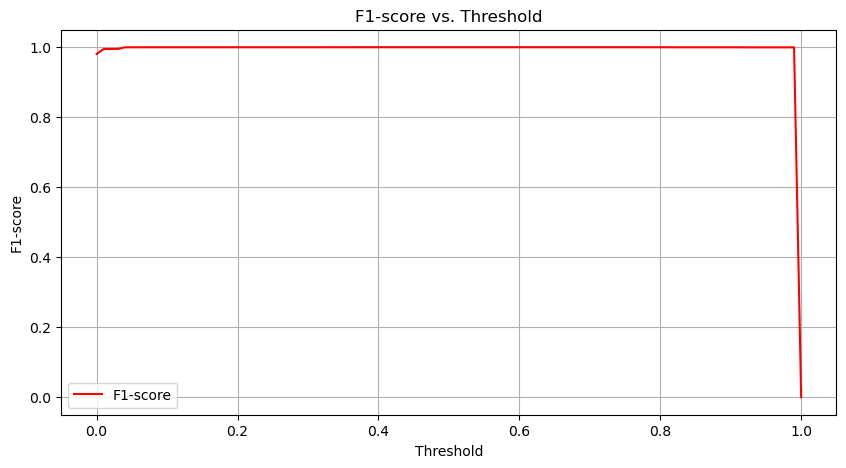

In [21]:
from sklearn.metrics import accuracy_score, precision_score, f1_score
import numpy as np

# Compute accuracy, precision, and f1-score for different thresholds
thresholds = np.linspace(0, 1, 100)
accuracies = []
precisions = []
f1_scores = []

for threshold in thresholds:
    y_pred_thresholded = (y_prob > threshold).astype(int)
    accuracies.append(accuracy_score(y_test, y_pred_thresholded))
    precisions.append(precision_score(y_test, y_pred_thresholded))
    f1_scores.append(f1_score(y_test, y_pred_thresholded))
    
    
# print('accuracies: ' + accuracy_score)
# print('precision: ' + precisions)
# print('F1: ' + accuracies)
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(thresholds, accuracies, label='Accuracy', color='blue')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Plot precision
plt.figure(figsize=(10, 5))
plt.plot(thresholds, precisions, label='Precision', color='green')
plt.xlabel('Threshold')
plt.ylabel('Precision')
plt.title('Precision vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Plot F1-score
plt.figure(figsize=(10, 5))
plt.plot(thresholds, f1_scores, label='F1-score', color='red')
plt.xlabel('Threshold')
plt.ylabel('F1-score')
plt.title('F1-score vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()


accuracy: 0.999601264140355
precision: 0.9999478759447485
f1: 0.9996482680458034


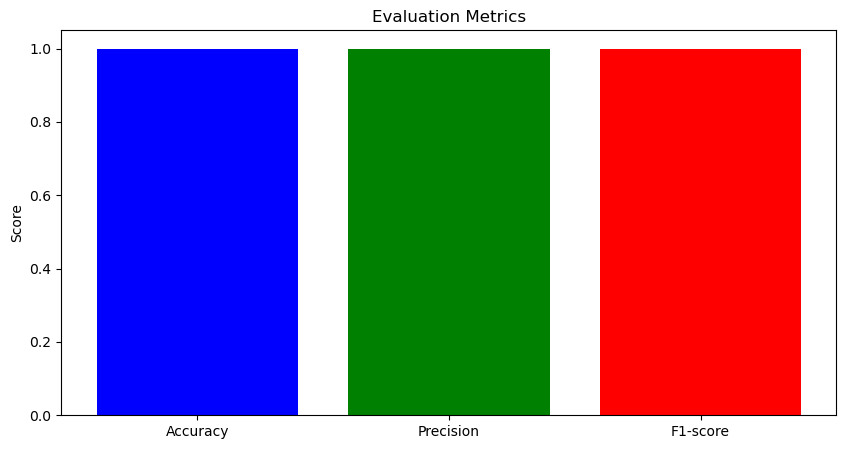

In [25]:
from sklearn.metrics import accuracy_score, precision_score, f1_score

# Compute accuracy, precision, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print('accuracy: ' + str(accuracy))
print('precision: ' + str(precision))
print('f1: ' + str(f1))
# Plotting
metrics = ['Accuracy', 'Precision', 'F1-score']
values = [accuracy, precision, f1]

plt.figure(figsize=(10, 5))
plt.bar(metrics, values, color=['blue', 'green', 'red'])
plt.ylabel('Score')
plt.title('Evaluation Metrics')
plt.show()


In [27]:
import joblib
# Save the trained model to a file
joblib.dump(rf_model, 'random_forest_model_ddos.pkl')

['random_forest_model_ddos.pkl']

In [ ]:
# Extracting false positives and false negatives from confusion matrix
FP = conf_matrix[0, 1]  # False positives: predicted DDoS, actual BENIGN
FN = conf_matrix[1, 0]  # False negatives: predicted BENIGN, actual DDoS

print("False Positives:", FP)
print("False Negatives:", FN)